<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
## Import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets

# import keras
# conda install -c conda-forge keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
diabetes = datasets.load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Prepare input data

In [4]:
# insert code here
df=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
df_target=pd.DataFrame(data=diabetes.target, columns=['target'])

In [6]:
df= pd.merge(df,df_target,left_index=True,right_index=True)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### Split the data (training/test)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [8]:
X=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
y=['target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X], df[y], 
    test_size = 0.3,
    random_state = 65)

In [10]:
# insert code here


### Create the model's architecture

In [103]:
# insert code here
model = Sequential()

In [104]:
n_cols=df[X].shape[1]
n_cols

10

In [105]:
# Add the first hidden layer
model.add(Dense(50, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(20, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear')) 

#model.layer.pop() #remove last layer

In [106]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                550       
                                                                 
 dense_13 (Dense)            (None, 20)                1020      
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,591
Trainable params: 1,591
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [107]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [108]:
%%time
# insert code here
fitted_model = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 27787.7012 - mse: 27787.7012 - val_loss: 30870.8887 - val_mse: 30870.8887
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 27746.9766 - mse: 27746.9766 - val_loss: 30820.8535 - val_mse: 30820.8535
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 27692.2148 - mse: 27692.2148 - val_loss: 30749.5996 - val_mse: 30749.5957
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 27613.2715 - mse: 27613.2715 - val_loss: 30646.5605 - val_mse: 30646.5645
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 27497.2285 - mse: 27497.2285 - val_loss: 30498.0312 - val_mse: 30498.0312
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 27331.8262 - mse: 27331.8262 - val_loss: 30290.0000 - val_mse: 30290.0000
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 27106.4082 - mse: 27106.4082 - val_loss: 300

### Create predictions

In [109]:
# insert code here

predict_x=model.predict(X_test) 
predict_x
#predictions=np.argmax(predict_x,axis=1)
#predictions

array([[180.51447 ],
       [194.77917 ],
       [170.21957 ],
       [245.44475 ],
       [182.82358 ],
       [258.86667 ],
       [162.44333 ],
       [ 71.313995],
       [147.69112 ],
       [173.65073 ],
       [224.88412 ],
       [200.45845 ],
       [103.02252 ],
       [223.13156 ],
       [108.99864 ],
       [210.10597 ],
       [ 79.274124],
       [132.28995 ],
       [136.08244 ],
       [146.4493  ],
       [ 77.9981  ],
       [ 83.097946],
       [178.48135 ],
       [138.01851 ],
       [214.0582  ],
       [181.48482 ],
       [116.622284],
       [ 95.21036 ],
       [169.52063 ],
       [222.66614 ],
       [240.18262 ],
       [242.44214 ],
       [157.94563 ],
       [133.8631  ],
       [126.57502 ],
       [160.38234 ],
       [111.925934],
       [213.91086 ],
       [193.6424  ],
       [125.09107 ],
       [116.778534],
       [121.53401 ],
       [192.52533 ],
       [220.44864 ],
       [149.40857 ],
       [238.07858 ],
       [163.80734 ],
       [191.4

### Evaluate the model

In [110]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

#score here is mse, need to change to rmse

#sqrt of score showing example +/- 57, is this good ?
print('\nTest loss: %.6f, Test RMSE: %.6f' % tuple(np.sqrt(score)))

1/1 [==============================] - 0s 17ms/step - loss: 3302.6094 - mse: 3302.6094

Test loss: 3302.609375, Test accuracy: 3302.609375

Test loss: 57.468334, Test RMSE: 57.468334


### Visualisation of cost

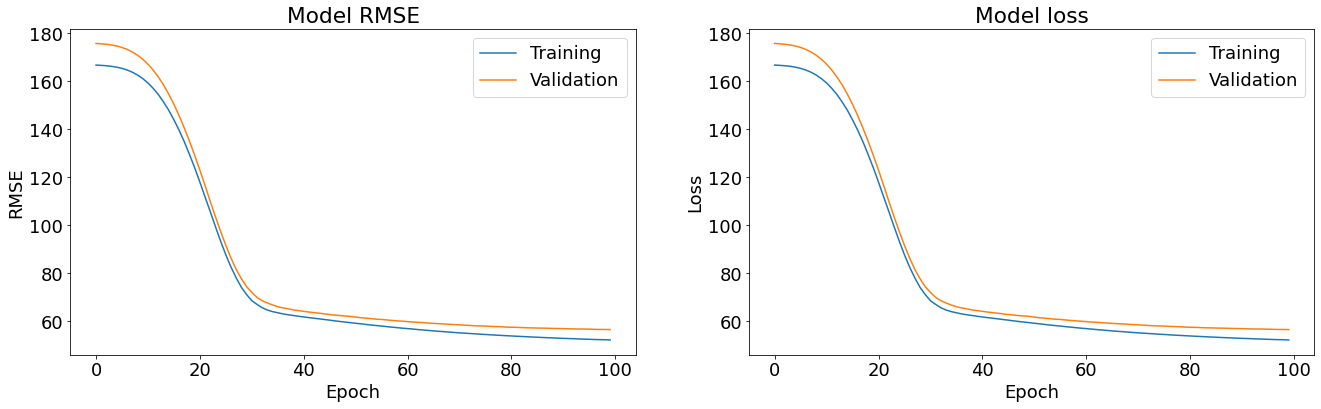

In [112]:
# insert code here
#rmse version

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(np.sqrt(fitted_model.history['mse']), label = 'Training')
ax[0].plot(np.sqrt(fitted_model.history['val_mse']), label = 'Validation')
ax[0].set_title('Model RMSE')
ax[0].set_ylabel('RMSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(np.sqrt(fitted_model.history['loss']), label = 'Training')
ax[1].plot(np.sqrt(fitted_model.history['val_loss']), label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [65]:
# insert code here

import seaborn as sns

In [72]:
residuals=predict_x-y_test

In [77]:
residuals

,target
180,73.445450
421,-17.569748
202,-24.869431
323,-2.067596
91,18.717789
...,...
119,-51.340591
84,-8.939949
435,60.121941
343,43.765396


<AxesSubplot:ylabel='target'>

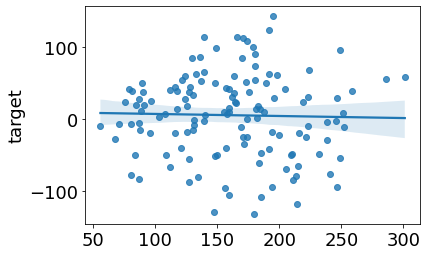

In [80]:
sns.regplot(x=predict_x,y=residuals,data=None,scatter=True)

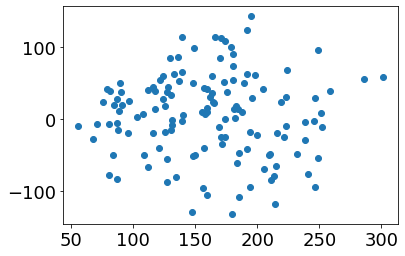

In [82]:
plt.scatter(x=predict_x,y=residuals)

© 2020 Institute of Data